# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + '1f6438c412fd0bb6a319895c5eec58b9' + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | ventspils
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | mungaoli
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | anicuns
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | pangkalan brandan
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | tofol
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 22 of Set 1 | kisa

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,280.94,97,68,1.34,NZ,1699125487
1,ventspils,57.3894,21.5606,282.11,93,75,3.60,LV,1699125487
2,bethel,41.3712,-73.4140,288.27,51,0,2.06,US,1699125462
3,bredasdorp,-34.5322,20.0403,288.85,86,100,2.18,ZA,1699125488
4,nuuk,64.1835,-51.7216,273.49,55,75,3.09,GL,1699125488


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,280.94,97,68,1.34,NZ,1699125487
1,ventspils,57.3894,21.5606,282.11,93,75,3.60,LV,1699125487
2,bethel,41.3712,-73.4140,288.27,51,0,2.06,US,1699125462
3,bredasdorp,-34.5322,20.0403,288.85,86,100,2.18,ZA,1699125488
4,nuuk,64.1835,-51.7216,273.49,55,75,3.09,GL,1699125488


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

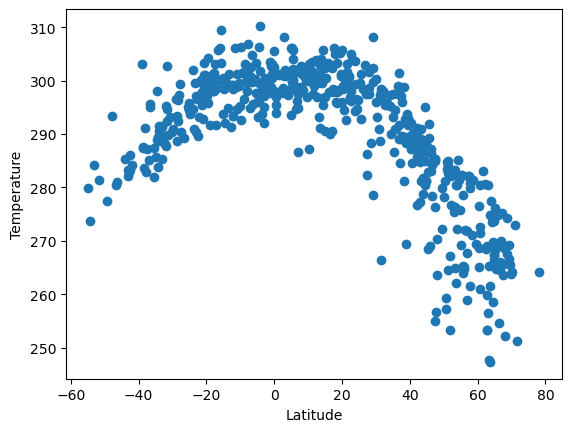

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

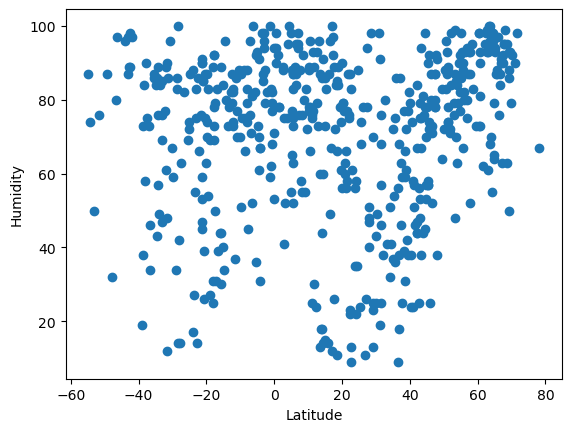

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

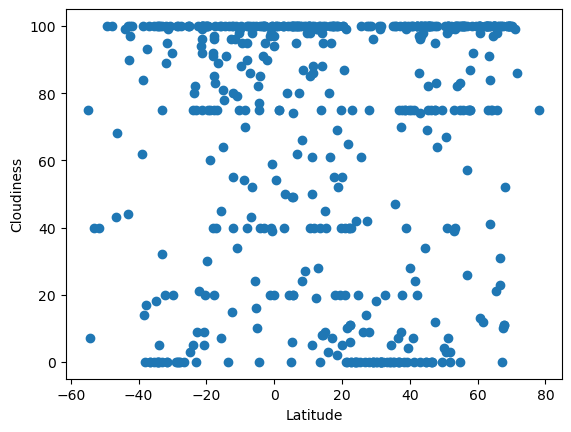

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

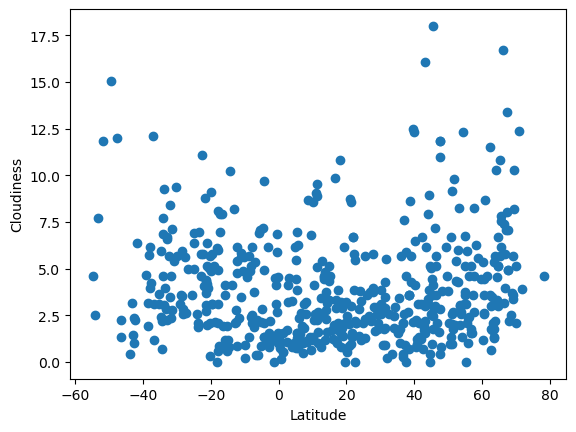

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ventspils,57.3894,21.5606,282.11,93,75,3.60,LV,1699125487
2,bethel,41.3712,-73.4140,288.27,51,0,2.06,US,1699125462
4,nuuk,64.1835,-51.7216,273.49,55,75,3.09,GL,1699125488
7,mungaoli,24.4167,78.1000,294.73,35,0,1.15,IN,1699125489
9,thompson,55.7435,-97.8558,265.24,67,75,1.03,CA,1699125233


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,280.94,97,68,1.34,NZ,1699125487
3,bredasdorp,-34.5322,20.0403,288.85,86,100,2.18,ZA,1699125488
5,grytviken,-54.2811,-36.5092,273.69,74,7,2.51,GS,1699125488
6,waitangi,-43.9535,-176.5597,285.27,96,99,0.45,NZ,1699125488
8,adamstown,-25.0660,-130.1015,295.79,74,100,6.93,PN,1699125489


###  Temperature vs. Latitude Linear Regression Plot

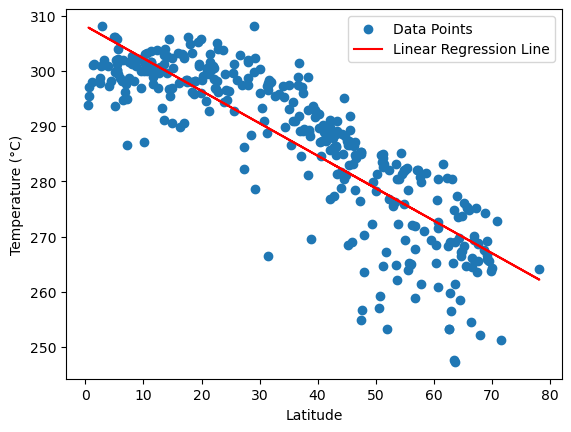

In [17]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat'].values.reshape(-1, 1)
y = northern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

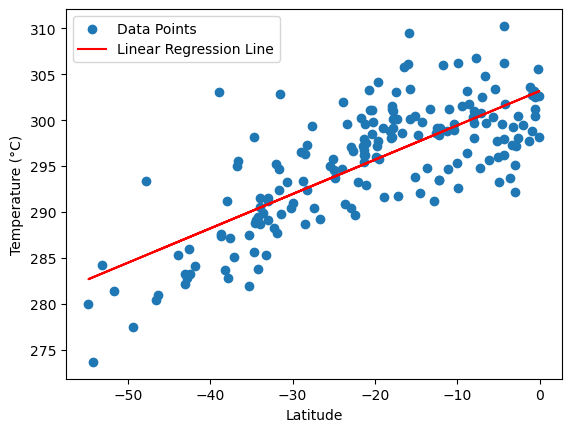

In [19]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat'].values.reshape(-1, 1)
y = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

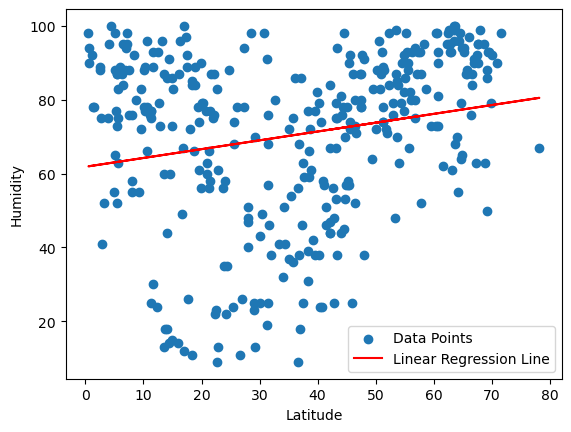

In [20]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values.reshape(-1, 1)
y = northern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()

plt.show()

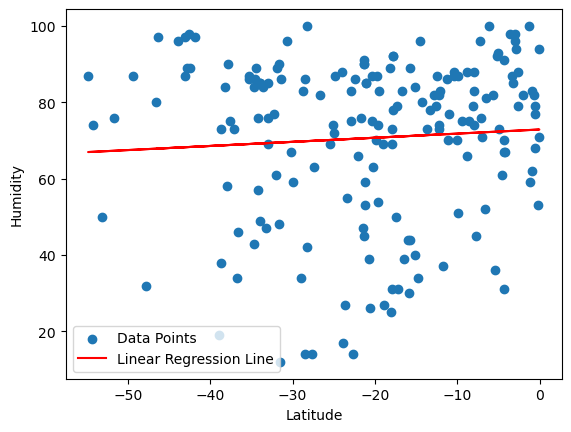

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values.reshape(-1, 1)
y = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()

plt.show()

**Discussion about the linear relationship:** The humidity level is higher near the equator and in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

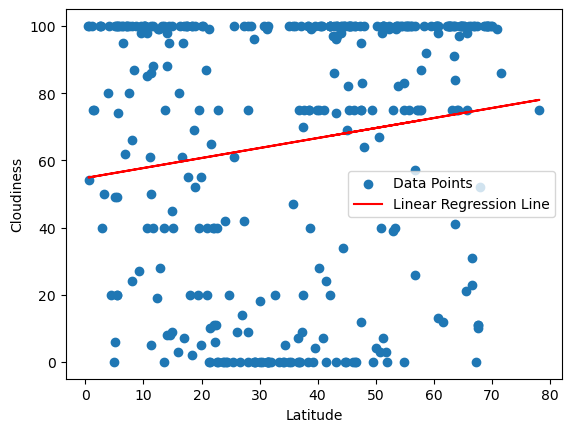

In [23]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values.reshape(-1, 1)
y = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()

plt.show()

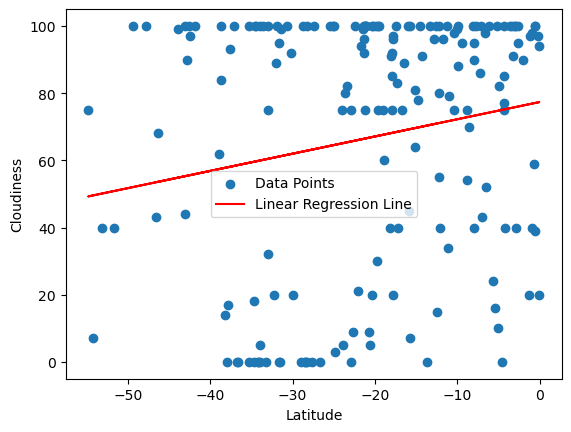

In [24]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values.reshape(-1, 1)
y = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()

plt.show()

**Discussion about the linear relationship:** According to the graphs, the data shows that the level of cloudiness gets higher the more north you go.

### Wind Speed vs. Latitude Linear Regression Plot

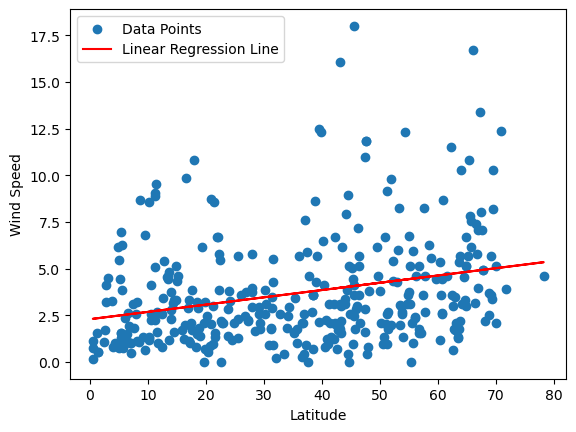

In [25]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values.reshape(-1, 1)
y = northern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()

plt.show()

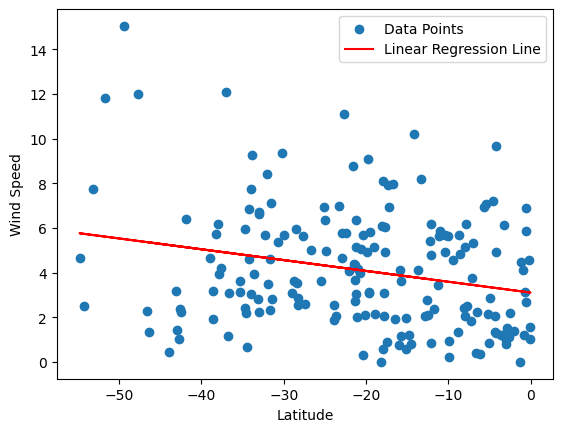

In [26]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values.reshape(-1, 1)
y = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
y_pred = slope * x.flatten() + intercept
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()

plt.show()

**Discussion about the linear relationship:** The graphs comparing wind speed and location appear to indicate a small increase of wind speed the further away from the equator the location is.